In [248]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import bs4 as bs
import datetime

In [349]:
def get_all_sp500_tickers():
    resp = requests.get('http://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
    soup = bs.BeautifulSoup(resp.text, 'lxml')
    table = soup.find('table', {'class': 'wikitable sortable'})
    tickers = []
    for row in table.findAll('tr')[1:]:
        ticker = row.findAll('td')[0].text
        tickers.append(ticker)
    tickers = [s.replace('\n', '') for s in tickers]
    return tickers

tickers_sp500 = get_all_sp500_tickers()
print(tickers_sp500)
print(len(tickers_sp500))

['MMM', 'AOS', 'ABT', 'ABBV', 'ACN', 'ADBE', 'AMD', 'AES', 'AFL', 'A', 'APD', 'ABNB', 'AKAM', 'ALB', 'ARE', 'ALGN', 'ALLE', 'LNT', 'ALL', 'GOOGL', 'GOOG', 'MO', 'AMZN', 'AMCR', 'AEE', 'AAL', 'AEP', 'AXP', 'AIG', 'AMT', 'AWK', 'AMP', 'AME', 'AMGN', 'APH', 'ADI', 'ANSS', 'AON', 'APA', 'AAPL', 'AMAT', 'APTV', 'ACGL', 'ADM', 'ANET', 'AJG', 'AIZ', 'T', 'ATO', 'ADSK', 'ADP', 'AZO', 'AVB', 'AVY', 'AXON', 'BKR', 'BALL', 'BAC', 'BK', 'BBWI', 'BAX', 'BDX', 'BRK.B', 'BBY', 'BIO', 'TECH', 'BIIB', 'BLK', 'BX', 'BA', 'BKNG', 'BWA', 'BSX', 'BMY', 'AVGO', 'BR', 'BRO', 'BF.B', 'BLDR', 'BG', 'BXP', 'CHRW', 'CDNS', 'CZR', 'CPT', 'CPB', 'COF', 'CAH', 'KMX', 'CCL', 'CARR', 'CTLT', 'CAT', 'CBOE', 'CBRE', 'CDW', 'CE', 'COR', 'CNC', 'CNP', 'CF', 'CRL', 'SCHW', 'CHTR', 'CVX', 'CMG', 'CB', 'CHD', 'CI', 'CINF', 'CTAS', 'CSCO', 'C', 'CFG', 'CLX', 'CME', 'CMS', 'KO', 'CTSH', 'CL', 'CMCSA', 'CAG', 'COP', 'ED', 'STZ', 'CEG', 'COO', 'CPRT', 'GLW', 'CPAY', 'CTVA', 'CSGP', 'COST', 'CTRA', 'CRWD', 'CCI', 'CSX', 'CMI', '

In [369]:
price_data = yf.download(tickers_sp500[:10], start=datetime.datetime(2023, 1, 1), end=None) # only a small subset for now

[*********************100%***********************]  10 of 10 completed


In [370]:
# transform multi column index into single column index with Ticker as column
df_price = price_data.stack().reset_index().rename(index=str, columns={"level_1": "Ticker"}).sort_values(['Ticker','Date'])
df_price.set_index('Date', inplace=True) # maybe leave out?
df_price.head(5)

/var/folders/93/9bwp5y9s6p925yjm6qkgky980000gn/T/ipykernel_24897/866795673.py:1: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  df_price = price_data.stack().reset_index().rename(index=str, columns={"level_1": "Ticker"}).sort_values(['Ticker','Date'])


Price,Ticker,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,,
2023-01-03 00:00:00+00:00,A,148.440598,150.039993,153.130005,148.470001,151.960007,1414300
2023-01-04 00:00:00+00:00,A,150.053238,151.669998,153.039993,150.240005,151.649994,1247400
2023-01-05 00:00:00+00:00,A,150.488541,152.110001,153.070007,148.770004,150.000000,1714600
2023-01-06 00:00:00+00:00,A,146.095886,147.669998,154.639999,143.009995,154.360001,2445000
2023-01-09 00:00:00+00:00,A,145.897995,147.470001,151.279999,147.199997,149.690002,1269600


In [187]:
# alternatively keep it like this with multi column index
df = yf.download(tickers=['AAPL', 'MSFT'], start='2023-01-01', end=None, interval='1d', actions=True, auto_adjust=False, keepna=True, ignore_tz=True, group_by='symbol')
df.head(10)

[*********************100%***********************]  2 of 2 completed


Ticker                           MSFT                                      \
Price                            Open        High         Low       Close   
Date                                                                        
2023-01-03 00:00:00+00:00  243.080002  245.750000  237.399994  239.580002   
2023-01-04 00:00:00+00:00  232.279999  232.869995  225.960007  229.100006   
2023-01-05 00:00:00+00:00  227.199997  227.550003  221.759995  222.309998   
2023-01-06 00:00:00+00:00  223.000000  225.759995  219.350006  224.929993   
2023-01-09 00:00:00+00:00  226.449997  231.240005  226.410004  227.119995   
2023-01-10 00:00:00+00:00  227.759995  231.309998  227.330002  228.850006   
2023-01-11 00:00:00+00:00  231.289993  235.949997  231.110001  235.770004   
2023-01-12 00:00:00+00:00  235.259995  239.899994  233.559998  238.509995   
2023-01-13 00:00:00+00:00  237.000000  239.369995  234.919998  239.229996   
2023-01-17 00:00:00+00:00  237.970001  240.910004  237.089996  240.350006   

Ticker                                                                  \
Price                       Adj Close    Volume Dividends Stock Splits   
Date                                                                     
2023-01-03 00:00:00+00:00  236.183533  25740000       0.0          0.0   
2023-01-04 00:00:00+00:00  225.852097  50623400       0.0          0.0   
2023-01-05 00:00:00+00:00  219.158340  39585600       0.0          0.0   
2023-01-06 00:00:00+00:00  221.741211  43613600       0.0          0.0   
2023-01-09 00:00:00+00:00  223.900177  27369800       0.0          0.0   
2023-01-10 00:00:00+00:00  225.605637  27033900       0.0          0.0   
2023-01-11 00:00:00+00:00  232.427536  28669300       0.0          0.0   
2023-01-12 00:00:00+00:00  235.128677  27269500       0.0          0.0   
2023-01-13 00:00:00+00:00  235.838486  21333300       0.0          0.0   
2023-01-17 00:00:00+00:00  236.942627  29831300       0.0          0.0   

Ticker                           AAPL                                      \
Price                            Open        High         Low       Close   
Date                                                                        
2023-01-03 00:00:00+00:00  130.279999  130.899994  124.169998  125.070000   
2023-01-04 00:00:00+00:00  126.889999  128.660004  125.080002  126.360001   
2023-01-05 00:00:00+00:00  127.129997  127.769997  124.760002  125.019997   
2023-01-06 00:00:00+00:00  126.010002  130.289993  124.889999  129.619995   
2023-01-09 00:00:00+00:00  130.470001  133.410004  129.889999  130.149994   
2023-01-10 00:00:00+00:00  130.259995  131.259995  128.119995  130.729996   
2023-01-11 00:00:00+00:00  131.250000  133.509995  130.460007  133.490005   
2023-01-12 00:00:00+00:00  133.880005  134.259995  131.440002  133.410004   
2023-01-13 00:00:00+00:00  132.029999  134.919998  131.660004  134.759995   
2023-01-17 00:00:00+00:00  134.830002  137.289993  134.130005  135.940002   

Ticker                                                                   
Price                       Adj Close     Volume Dividends Stock Splits  
Date                                                                     
2023-01-03 00:00:00+00:00  123.904625  112117500       0.0          0.0  
2023-01-04 00:00:00+00:00  125.182610   89113600       0.0          0.0  
2023-01-05 00:00:00+00:00  123.855087   80962700       0.0          0.0  
2023-01-06 00:00:00+00:00  128.412231   87754700       0.0          0.0  
2023-01-09 00:00:00+00:00  128.937286   70790800       0.0          0.0  
2023-01-10 00:00:00+00:00  129.511871   63896200       0.0          0.0  
2023-01-11 00:00:00+00:00  132.246170   69458900       0.0          0.0  
2023-01-12 00:00:00+00:00  132.166916   71379600       0.0          0.0  
2023-01-13 00:00:00+00:00  133.504333   57809700       0.0          0.0  
2023-01-17 00:00:00+00:00  134.673340   63646600       0.0          0.0

# download symbols and meta data

In [203]:
# individual way
ticker = yf.Ticker('AAPL')
#ticker.income_stmt
#ticker.analyst_price_targets
#ticker.balancesheet
#ticker.cashflow
#ticker.history_metadata
geographical = ['address1', 'city', 'state', 'zip', 'country']
practical = ['symbol', 'shortName', 'longName', 'industry', 'sector', 'exchange', 'currency', 'website', 'irWebsite', 'companyOfficers', 'longBusinessSummary']
metrics = ['beta', 'trailingPE', 'forwardPE', 'volume', 'marketCap', 'profitMargins', 'trailingEps', 'forwardEps', 'trailingPegRatio', 'pegRatio', 'dividendRate', 'dividendYield']

ticker_df_meta = pd.DataFrame.from_dict(ticker.info)[practical + geographical + metrics].head(1)
ticker_df_meta

,symbol,shortName,longName,industry,sector,exchange,currency,website,irWebsite,companyOfficers,...,forwardPE,volume,marketCap,profitMargins,trailingEps,forwardEps,trailingPegRatio,pegRatio,dividendRate,dividendYield
0,AAPL,Apple Inc.,Apple Inc.,Consumer Electronics,Technology,NMS,USD,https://www.apple.com,http://investor.apple.com/,"{'maxAge': 1, 'name': 'Mr. Timothy D. Cook', '...",...,29.467245,7719964,3351211671552,0.26441,6.56,7.48,2.1125,2.96,1.0,0.0045


## best approach

In [372]:
def get_meta_data_from_tick(tick):
    ticker = yf.Ticker(tick)
    geographical = ['address1', 'city', 'state', 'zip', 'country']
    practical = ['symbol', 'shortName', 'longName', 'industry', 'sector', 'exchange', 'currency', 'website', 'irWebsite', 'companyOfficers', 'longBusinessSummary']
    metrics = ['beta', 'trailingPE', 'forwardPE', 'volume', 'marketCap',
                'profitMargins', 'trailingEps', 'forwardEps', 'trailingPegRatio', 'pegRatio', 'dividendRate', 'dividendYield']

    try:
        ticker_df_meta = pd.DataFrame.from_dict(ticker.info)
    except ValueError:
        print(ticker)
        print(ticker.info)
    
    ticker_df_meta = ticker_df_meta.reindex(practical + geographical + metrics, axis=1)
    ticker_df_meta_subset = ticker_df_meta[practical + geographical + metrics].head(1)
    ticker_df_meta_subset = ticker_df_meta_subset.rename(columns={'symbol':'Ticker'})
    return ticker_df_meta_subset

#ticker.history(start='2023-01-01', end=None, interval='1d', actions=True, auto_adjust=False, keepna=True)

In [373]:
ticker_list = [tick for tick in tickers_sp500 if tick not in ['BRK.B', 'BF.B']]#['AAPL', 'MSFT', 'O', 'PEP']

df_meta = get_meta_data_from_tick(ticker_list[0])
for tick in ticker_list[1:]:
    df_new = get_meta_data_from_tick(tick)
    df_meta = pd.concat([df_meta, df_new]).reset_index(drop=True)

df_meta.head(5)

/var/folders/93/9bwp5y9s6p925yjm6qkgky980000gn/T/ipykernel_24897/4034422827.py:6: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_meta = pd.concat([df_meta, df_new]).reset_index(drop=True)
/var/folders/93/9bwp5y9s6p925yjm6qkgky980000gn/T/ipykernel_24897/4034422827.py:6: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_meta = pd.concat([df_meta, df_new]).reset_index(drop=True)
/var/folders/93/9bwp5y9s6p925yjm6qkgky980000gn/T/ipykernel_24897/4034422827.py:6: FutureWarning: The behavior of DataFra

,Ticker,shortName,longName,industry,sector,exchange,currency,website,irWebsite,companyOfficers,...,forwardPE,volume,marketCap,profitMargins,trailingEps,forwardEps,trailingPegRatio,pegRatio,dividendRate,dividendYield
0,MMM,3M Company,3M Company,Conglomerates,Industrials,NYQ,USD,https://www.3m.com,http://phx.corporate-ir.net/phoenix.zhtml?c=80...,"{'maxAge': 1, 'name': 'Mr. Michael F. Roman', ...",...,16.221167,1057035,70309068800,0.02891,2.58,7.89,NaN,-4.58,2.80,0.0215
1,AOS,A.O. Smith Corporation,A. O. Smith Corporation,Specialty Industrial Machinery,Industrials,NYQ,USD,https://www.aosmith.com,http://investor.shareholder.com/aosmith/,"{'maxAge': 1, 'name': 'Mr. Kevin J. Wheeler', ...",...,17.794931,127411,11263608832,0.14674,3.87,4.34,1.8087,1.92,1.28,0.0163
2,ABT,Abbott Laboratories,Abbott Laboratories,Medical Devices,Healthcare,NYQ,USD,https://www.abbott.com,http://www.abbottinvestor.com/phoenix.zhtml?c=...,"{'maxAge': 1, 'name': 'Mr. Robert B. Ford', 'a...",...,24.840130,1489167,201402122240,0.13645,3.17,4.66,4.2756,3.61,2.20,0.0188
3,ABBV,AbbVie Inc.,AbbVie Inc.,Drug Manufacturers - General,Healthcare,NYQ,USD,https://www.abbvie.com,NaN,"{'maxAge': 1, 'name': 'Mr. Richard A. Gonzalez...",...,16.162945,951208,345160515584,0.09707,2.99,12.09,0.4868,2.93,6.20,0.0311
4,ACN,Accenture plc,Accenture plc,Information Technology Services,Technology,NYQ,USD,https://www.accenture.com,http://investor.accenture.com/phoenix.zhtml?c=...,"{'maxAge': 1, 'name': 'Ms. Julie T. Spellman S...",...,26.863852,482881,215050158080,0.10785,10.92,12.78,2.2530,4.07,5.16,0.0148


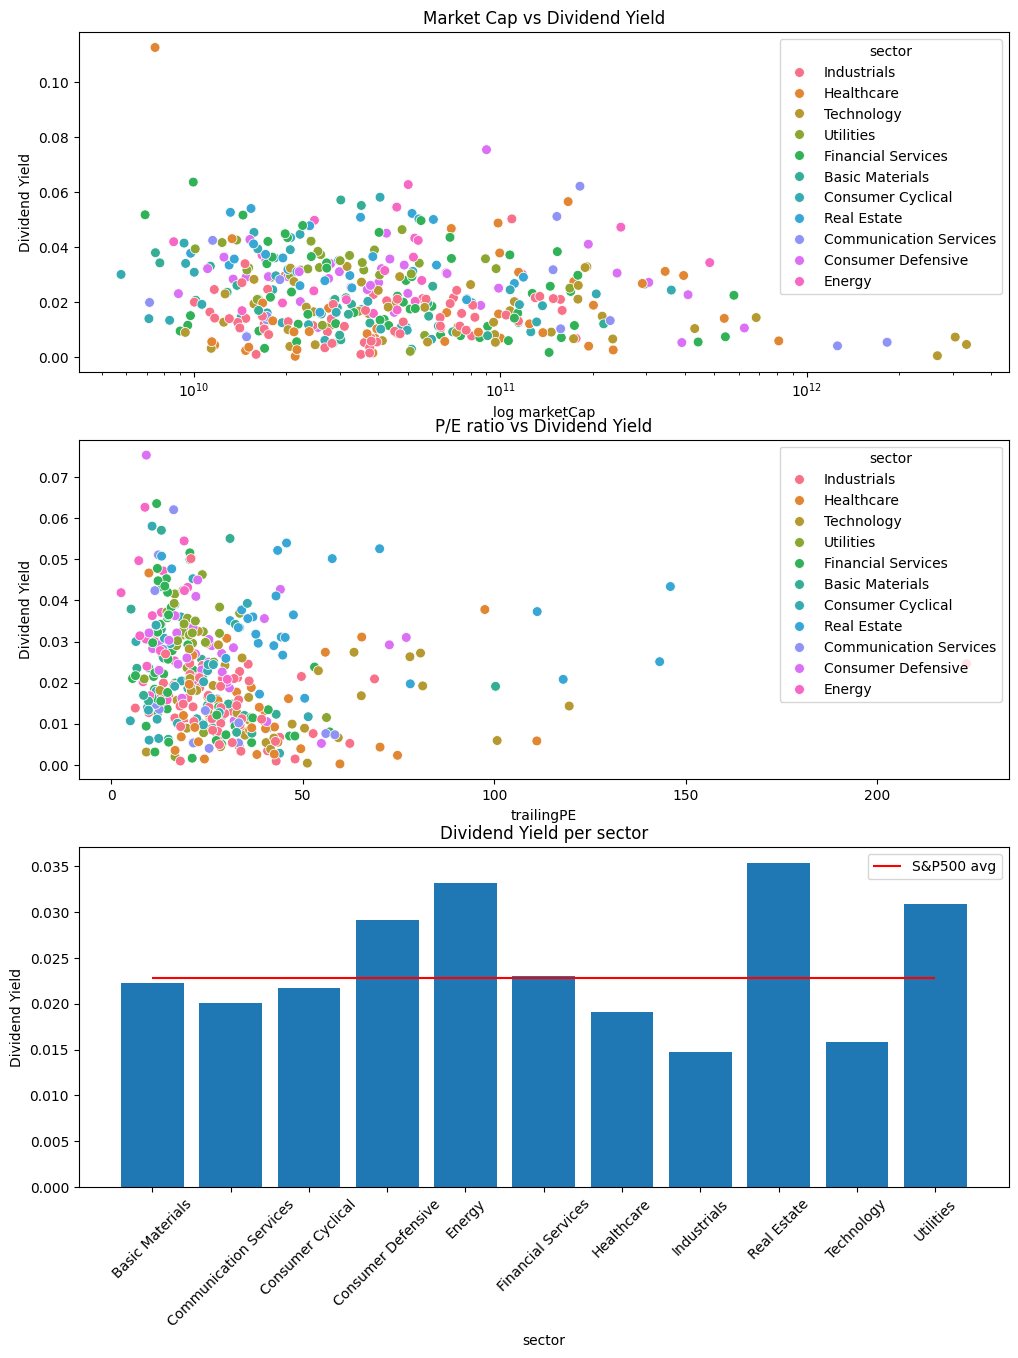

In [374]:
fig, ax = plt.subplots(3, 1, figsize=(12, 15))
sns.scatterplot(data=df_meta, x='marketCap', y='dividendYield', hue='sector', s=50, ax=ax[0])
ax[0].set_title('Market Cap vs Dividend Yield')
ax[0].set_xlabel('log marketCap')
ax[0].set_ylabel('Dividend Yield')
ax[0].set_xscale('log')

sns.scatterplot(data=df_meta, x='trailingPE', y='dividendYield', hue='sector', s=50, ax=ax[1])
ax[1].set_title('P/E ratio vs Dividend Yield')
ax[1].set_xlabel('trailingPE')
ax[1].set_ylabel('Dividend Yield')


ax[2].bar(df_meta.groupby('sector').mean('dividendYield').index, df_meta.groupby('sector').mean('dividendYield')['dividendYield'])
ax[2].set_title('Dividend Yield per sector')
ax[2].set_xlabel('sector')
ax[2].set_ylabel('Dividend Yield')
ax[2].xaxis.set_tick_params(rotation=45)
ax[2].hlines(xmin=df_meta.groupby('sector').mean('dividendYield').index[0], 
             xmax=df_meta.groupby('sector').mean('dividendYield').index[-1], 
             y=df_meta['dividendYield'].mean(), color='red', label='S&P500 avg')
ax[2].legend()
plt.show()